In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# off warning
import warnings
warnings.filterwarnings("ignore")

In [35]:
def write_answer(answ, name):
    with open(name+".txt", "w") as fout:
        fout.write(str(answ))

In [9]:
digits_dts = load_digits()
X = digits_dts['data']
y = digits_dts['target']

In [36]:
# task 1

CV = 10
estimator = DecisionTreeClassifier()
scores = cross_val_score(estimator, X, y.reshape(-1, 1), cv=CV)
print(f"Scores: {scores}\nMean: {scores.mean()}")
write_answer(scores.mean(), "ans1")

Scores: [0.79444444 0.85       0.83888889 0.8        0.78333333 0.9
 0.89444444 0.82122905 0.82681564 0.82122905]
Mean: 0.8330384854127871


In [37]:
# task 2

CV = 10
estimator = DecisionTreeClassifier()
bagging = BaggingClassifier(estimator, n_estimators=100)
scores = cross_val_score(bagging, X, y.reshape(-1, 1), cv=CV)
print(f"Scores: {scores}\nMean: {scores.mean()}")
write_answer(scores.mean(), "ans2")

Scores: [0.87777778 0.96111111 0.89444444 0.91666667 0.92777778 0.98888889
 0.96111111 0.92178771 0.88268156 0.91061453]
Mean: 0.9242861576660459


In [38]:
# task 3

CV = 10
features =  math.sqrt(X.shape[1]) / X.shape[1]
estimator = DecisionTreeClassifier()
bagging = BaggingClassifier(estimator, n_estimators=100, max_features=features)
scores = cross_val_score(bagging, X, y.reshape(-1, 1), cv=CV)
print(f"Scores: {scores}\nMean: {scores.mean()}")
write_answer(scores.mean(), "ans3")

Scores: [0.88333333 0.95       0.91111111 0.88888889 0.95555556 0.92777778
 0.96111111 0.96648045 0.92178771 0.91620112]
Mean: 0.9282247051520793


In [39]:
# task 4

CV = 10
features =  math.sqrt(X.shape[1]) / X.shape[1]
estimator = DecisionTreeClassifier(max_features=features)
bagging = BaggingClassifier(estimator, n_estimators=100)
scores = cross_val_score(bagging, X, y.reshape(-1, 1), cv=CV)
print(f"Scores: {scores}\nMean: {scores.mean()}")
write_answer(scores.mean(), "ans4")

Scores: [0.90555556 0.96666667 0.95555556 0.92222222 0.96666667 0.97222222
 0.97777778 0.95530726 0.94413408 0.93854749]
Mean: 0.9504655493482309


Bagging scores: [0.91111111 0.97222222 0.96111111 0.93333333 0.95555556 0.95
 0.96111111 0.95530726 0.93296089 0.93296089]
Mean: 0.9465673494723774
RFC scores: [0.88333333 0.97222222 0.93333333 0.93333333 0.96111111 0.97222222
 0.96111111 0.95530726 0.93296089 0.93854749]
Mean: 0.9443482309124767


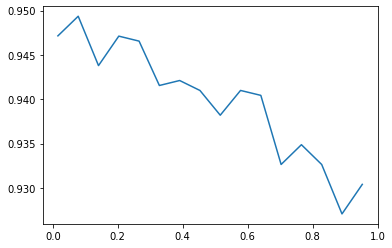

In [48]:
# task 5

# 
CV = 10
features =  math.sqrt(X.shape[1]) / X.shape[1]

estimator = DecisionTreeClassifier(max_features=features)
bagging = BaggingClassifier(estimator, n_estimators=100)

rfc = RandomForestClassifier(max_features=features)
scores_bag = cross_val_score(bagging, X, y.reshape(-1, 1), cv=CV)
scores_rfc = cross_val_score(rfc, X, y.reshape(-1, 1), cv=CV)

print(f"Bagging scores: {scores_bag}\nMean: {scores_bag.mean()}")
print(f"RFC scores: {scores_rfc}\nMean: {scores_rfc.mean()}")

#
f_nums = [n/X.shape[1] for n in range(1, X.shape[1], 4)]
scores_rfc2 = []
for fn in f_nums:
    rfc = RandomForestClassifier(max_features=fn)
    scores_rfc = cross_val_score(rfc, X, y.reshape(-1, 1), cv=CV)
    scores_rfc2.append(scores_rfc.mean())
sns.lineplot(f_nums, scores_rfc2)

In [47]:
help(sns.lineplot)

Help on function lineplot in module seaborn.relational:

lineplot(x=None, y=None, hue=None, size=None, style=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, dashes=True, markers=None, style_order=None, units=None, estimator='mean', ci=95, n_boot=1000, sort=True, err_style='band', err_kws=None, legend='brief', ax=None, **kwargs)
    Draw a line plot with possibility of several semantic groupings.
    
    The relationship between ``x`` and ``y`` can be shown for different subsets
    of the data using the ``hue``, ``size``, and ``style`` parameters. These
    parameters control what visual semantics are used to identify the different
    subsets. It is possible to show up to three dimensions independently by
    using all three semantic types, but this style of plot can be hard to
    interpret and is often ineffective. Using redundant semantics (i.e. both
    ``hue`` and ``style`` for the same variable) can be helpful for makin

In [14]:
y.reshape(-1, 1).shape

(1797, 1)